In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [2]:
# implemented function
def get_perspective_transform(in_points, out_points):
    """
    t_i * [u_i, v_i, 1] = M * [x_i, y_i, 1]
    
    M = [[a0, a1, a2], [b0, b1, b2], [c0, c1, 1]]
    
    Later 1 comes from perspective equations, particularly from the fact that we can factor out any common divisor:
    u_i = (a0*x_i + a1*y_i + a2)/(c0*x_i + c1*y_i + 1)
    v_i = (b0*x_i + b1*y_i + b2)/(c0*x_i + c1*y_i + 1)
    
    Same equations can be rewrittten (from where system for a0-c1 deduced):
    u_i = (a0*x_i + a1*y_i + a2) - u_i*(c0*x_i + c1*y_i)
    v_i = (b0*x_i + b1*y_i + b2) - v_i*(c0*x_i + c1*y_i)
    """
    x, y = np.split(in_points, [1], axis=1)  # x, y are column-vectors [4 x 1]
    u, v = np.split(out_points, [1], axis=1) # u, v are column-vectors [4 x 1] (a.k.a: x', y') 
    
    # construct system of linear equations: Ac=b
    mxu = -x*u
    myu = -y*u
    mxv = -x*v
    myv = -y*v
    
    ones = np.ones((4,1))
    zeros = np.zeros((4,3))
    
    b = np.concatenate((u,v), axis=0)
    
    A_upper = np.concatenate((x, y, ones, zeros, mxu, myu), axis=1)
    A_lower = np.concatenate((zeros, x, y, ones, mxv, myv), axis=1)
    A = np.concatenate((A_upper, A_lower), axis=0)
    
    # solve for c (coefficients)
    c = np.linalg.pinv(A) @ b
    
    # append 1 to the end and reshape into [3 x 3] matrix
    M = np.concatenate((c,np.ones((1,1))), axis=0).reshape(3,3)
    
    return M

In [3]:
def url_to_image(url):
    print("downloading %s" % (url))
    return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg


In [4]:
(r,c) = img.shape[:2]
pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])

In [5]:
#own implementation
M = get_perspective_transform(pts1, pts2)
dst = cv2.warpPerspective(img,M,(300, 400))

In [6]:
# reference
M_cv2 = cv2.getPerspectiveTransform(pts1,pts2)
dst_cv2 = cv2.warpPerspective(img,M_cv2,(300, 400))

In [7]:
np.allclose(dst, dst_cv2)

True

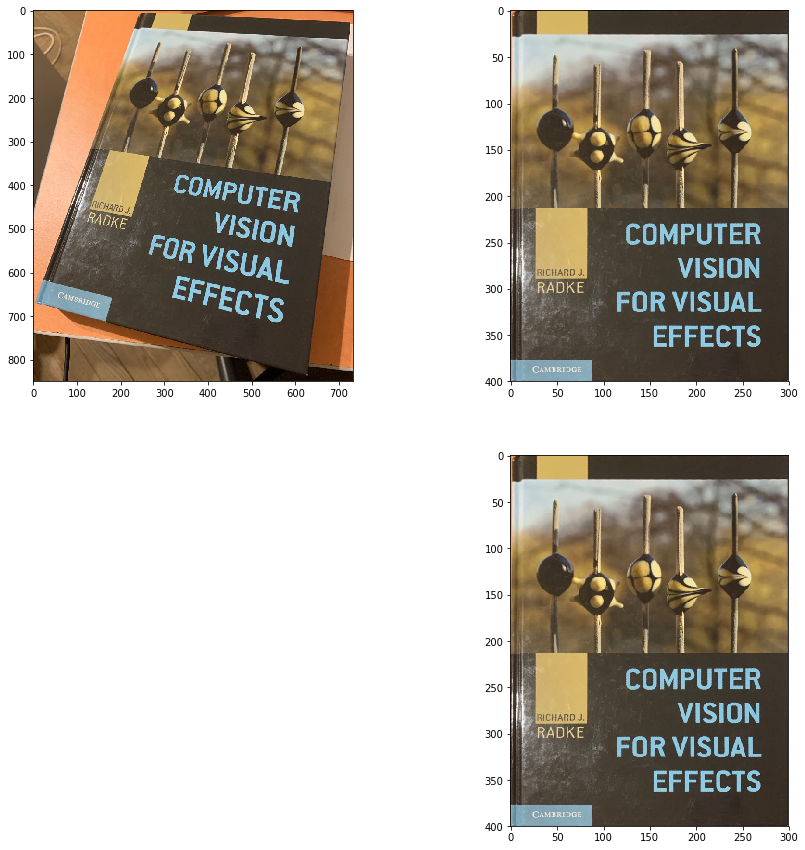

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(img[..., ::-1])
plt.subplot(2,2,2)
plt.imshow(dst[..., ::-1])
plt.subplot(2,2,4)
plt.imshow(dst_cv2[..., ::-1])